# Read and plot DTS data
This notebook shows how to read DTS data from a .csv file and plot it.

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import scipy

In [2]:
# Read temperature data
infile = '../data/DTS/temp_cal_valid_cable_rmnoise.csv'
df_temp = pd.read_csv(infile, index_col=0)
df_temp.columns = pd.to_datetime(df_temp.columns)
df_temp.head()

,2023-08-09 17:09:32.415,2023-08-09 17:14:32.521,2023-08-09 17:19:32.622,2023-08-09 17:24:32.751,2023-08-09 17:29:32.871,2023-08-09 17:34:33.023,2023-08-09 17:39:33.151,2023-08-09 17:44:33.281,2023-08-09 17:49:33.393,2023-08-09 17:54:33.510,...,2023-08-29 13:21:53.278,2023-08-29 13:26:53.872,2023-08-29 13:31:54.456,2023-08-29 13:36:55.019,2023-08-29 13:41:55.583,2023-08-29 13:46:56.141,2023-08-29 13:51:56.718,2023-08-29 13:56:57.291,2023-08-29 14:01:57.900,2023-08-29 14:02:08.202
-22.999,21.8724,21.9242,21.7593,22.0574,22.2256,22.5217,22.7067,22.8808,23.2244,23.5173,...,25.5453,25.3991,25.4547,25.4546,25.6803,25.7883,25.9772,25.8514,25.8928,26.1549
-22.745,21.8849,21.9424,21.7415,22.0645,22.2294,22.5077,22.7098,22.8978,23.2494,23.5068,...,25.5339,25.4029,25.4845,25.4733,25.6727,25.8092,25.9818,25.8577,25.9044,26.1569
-22.490,21.8829,21.9581,21.7719,22.0786,22.2661,22.4844,22.7420,22.8877,23.2459,23.5008,...,25.5144,25.4283,25.4984,25.5012,25.6936,25.8112,25.9707,25.8581,25.9104,26.0933
-22.236,21.9095,21.9571,21.7812,22.0970,22.2612,22.4886,22.7592,22.8818,23.2265,23.4932,...,25.5312,25.4563,25.5038,25.5070,25.7078,25.7885,25.9619,25.8641,25.9341,26.1819
-21.982,21.9441,21.9227,21.7831,22.0871,22.2620,22.5016,22.7392,22.8826,23.2373,23.5235,...,25.5722,25.4460,25.5155,25.5173,25.7258,25.8020,25.9593,25.8840,25.9210,26.2319


In [4]:
# Put temperatur data, optical distances and sampling times into numpy arrays
temp_arr = df_temp.to_numpy().T # we want to have the time to be in the 0-axis to be consistent with DAS data
times = pd.to_datetime(df_temp.columns)
dists = df_temp.index.to_numpy()

In [5]:
# plot selected DTS data over time
# enter water at: 560m, exit water at 7565m
start_dist = 2820 # east ridge at 2820m optical distance
end_dist = 3150 # seafloor from ~3150m optical distance onward

start_time = times[0] #datetime.datetime(2023,8,9)
end_time = times[-1] #datetime.datetime(2023,8,30)

t_idx_start = np.argmin(np.abs(times-start_time))
t_idx_end = np.argmin(np.abs(times-end_time))
d_idx_start = np.argmin(np.abs(dists-start_dist))
d_idx_end = np.argmin(np.abs(dists-end_dist))

plot_arr = temp_arr[t_idx_start:t_idx_end, d_idx_start:d_idx_end]
plot_times = times[t_idx_start:t_idx_end]
plot_dists = dists[d_idx_start:d_idx_end]

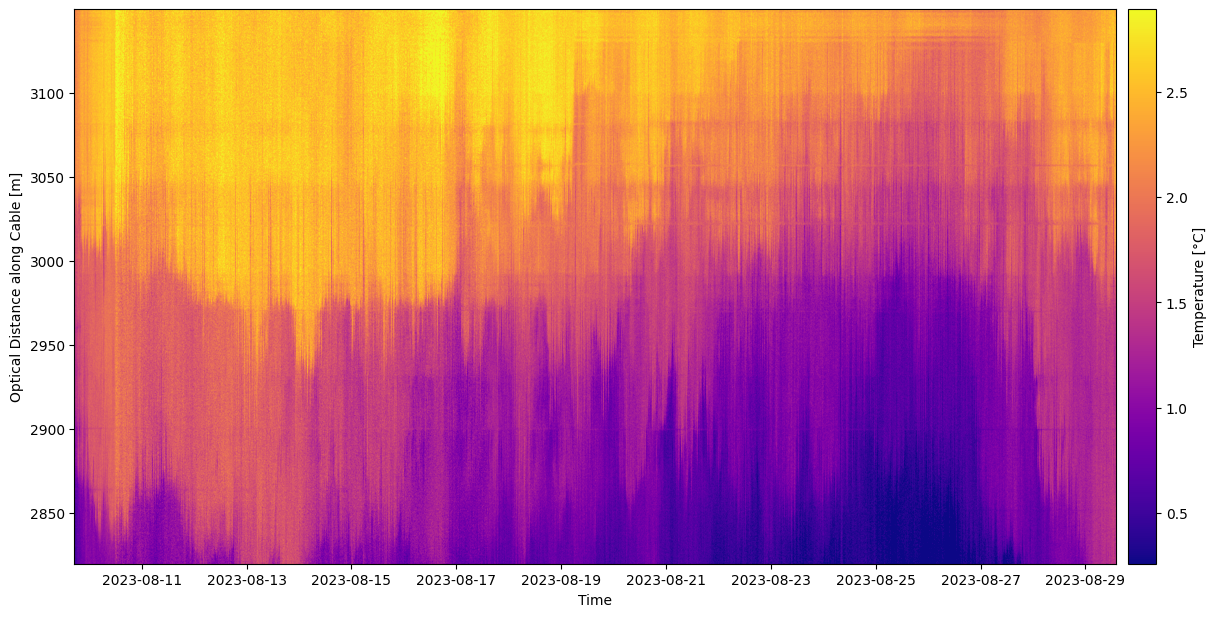

In [69]:
fig, ax = plt.subplots(figsize=(2.5*6.4,1.5*4.8))

# left plot (waterfall-like plot)
im1 = ax.imshow(plot_arr.T, origin='lower',
           aspect='auto',
            extent=[plot_times[0], plot_times[-1],
                   plot_dists[0], plot_dists[-1]],
            cmap='plasma',
            vmin=np.percentile(plot_arr[~np.isnan(plot_arr)],1),
            vmax=np.percentile(plot_arr[~np.isnan(plot_arr)],99),
            # interpolation='none',
            # vmin=3.2,
            # vmax=2.8
            )

ax.set_ylabel('Optical Distance along Cable [m]')
ax.set_xlabel('Time')

cbar = fig.colorbar(im1, pad=0.01)
cbar.set_label('Temperature [°C]')
plt.show()

In [9]:
plot_arr_t_deriv = np.gradient(plot_arr, axis=0)

In [11]:
plot_dists[1] - plot_dists[0]
np.shape(plot_arr_t_deriv)

(5714, 1298)

In [12]:
# Apply gaussian filter to the vertical componets of dts_data
for i in range(len(plot_times)):
    plot_arr_t_deriv[i, :] = scipy.ndimage.gaussian_filter(plot_arr_t_deriv[i, :], sigma=20)

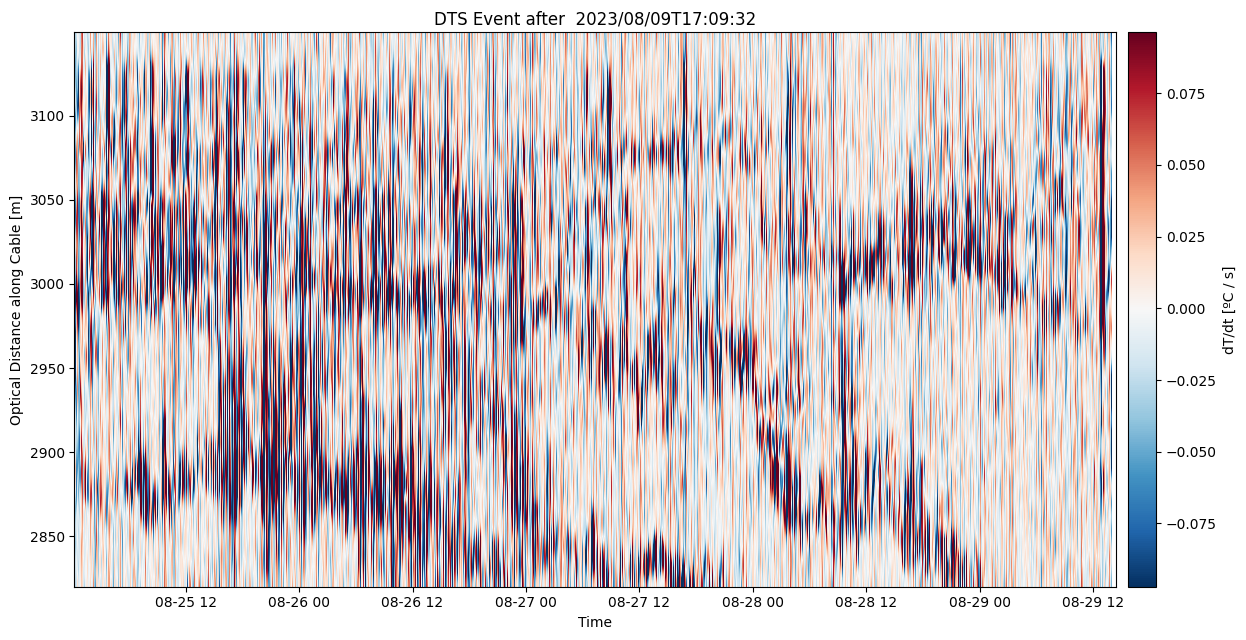

In [13]:
# Plot
fig2, ax2 = plt.subplots(figsize=(2.5*6.4,1.5*4.8))

im2 = ax2.imshow(plot_arr_t_deriv.T, aspect='auto',
             origin='lower',
             vmin=np.percentile(plot_arr_t_deriv[~np.isnan(plot_arr_t_deriv)],5),
             vmax=np.percentile(plot_arr_t_deriv[~np.isnan(plot_arr_t_deriv)],95),
             extent=[plot_times[0], plot_times[-1],
                  plot_dists[0], plot_dists[-1]],
             cmap='RdBu_r',
             # interpolation='none',
               zorder=0
             )

ax2.set_ylabel('Optical Distance along Cable [m]')
ax2.set_xlabel('Time')
ax2.set_title('DTS Event after  {}'.format(plot_times[0].strftime("%Y/%m/%dT%H:%M:%S")))
ax2.set_xlim(pd.to_datetime("2023-08-25 00:13:10"), pd.to_datetime("2023-08-29 14:25:56"))

cbar = fig2.colorbar(im2, pad=0.01)
cbar.set_label('dT/dt [ºC / s]')